In [46]:
import math

import pandas as pd
import torch

from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt


print(torch.__version__)


1.9.0


# Data Preprocessing


In [65]:
area = ['north', 'south', 'des']

df_train = pd.read_csv('../../bricks_data/des.csv')
#df_train, df_val = train_test_split(df, test_size=0.3, random_state=666, shuffle=True)
#df_train, df_test = train_test_split(df_train, test_size=0.5, random_state=666, shuffle=True)
df_test = pd.read_csv('../../bricks_data/des_test.csv')


In [113]:

from sklearn.linear_model import LinearRegression, Ridge, Lasso
galaxy_types = ['lrg','elg','qso']
areas = ['north', 'south', 'des']
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(1)


In [114]:
df_test_des = None
df_test_north = None
df_test_south = None
for area in areas:
    df_train = pd.read_csv(f'../../bricks_data/{area}.csv')
    df_train = df_train.drop(columns=['pixel_id', 'exposures'], axis=1, inplace=False)
    df_test = pd.read_csv(f'../../bricks_data/{area}_test.csv')
    df_tested = df_test.drop(columns=['pixel_id', 'exposures'], axis=1, inplace=False)

    print()
    print(f"======== {area} =========")
    print()
    for gal in galaxy_types:
        y_train = df_train[gal]#.to_numpy(copy=True)
        X_train = df_train.drop(columns=['lrg','elg','qso'])#.to_numpy(copy=True)
        X_train = poly.fit_transform(X_train)
        y_gold = df_tested[gal]
        X_test = df_tested.drop(columns=['lrg','elg','qso'])
        X_test = poly.fit_transform(X_test)
        reg = LinearRegression()
        reg.fit(X_train,y_train)
        y_pred = reg.predict(X_test)
        name = f"{gal}_lin"
        df_test[name] = y_pred
        if area == "north":
            df_test_north = df_test
        elif area == "south":
            df_test_south = df_test
        else:
            df_test_des = df_test

        print(f"Linear Regression R^2 for {gal}, Geometric :  {metrics.r2_score(y_gold, y_pred)}.")
        print(f"Linear Regression RMSE for {gal}, Geometric :  {math.sqrt(metrics.mean_squared_error(y_gold, y_pred))}.")
        print(f"Linear Regression MAE for {gal}, Geometric :  {metrics.mean_absolute_error(y_gold, y_pred)}.")

        print()



======== north =========

Linear Regression R^2 for lrg, Geometric :  0.015394936169803364.
Linear Regression RMSE for lrg, Geometric :  11.87714334087167.
Linear Regression MAE for lrg, Geometric :  8.730957429419574.

Linear Regression R^2 for elg, Geometric :  0.16444013306651617.
Linear Regression RMSE for elg, Geometric :  20.473451956877735.
Linear Regression MAE for elg, Geometric :  15.770991680628956.

Linear Regression R^2 for qso, Geometric :  0.09568910201664349.
Linear Regression RMSE for qso, Geometric :  27.627310169967128.
Linear Regression MAE for qso, Geometric :  21.519117586645468.


======== south =========

Linear Regression R^2 for lrg, Geometric :  0.018278016529419294.
Linear Regression RMSE for lrg, Geometric :  11.708979805188887.
Linear Regression MAE for lrg, Geometric :  8.52728164208111.

Linear Regression R^2 for elg, Geometric :  0.07514136207341826.
Linear Regression RMSE for elg, Geometric :  22.36856027973132.
Linear Regression MAE for elg, Geometri

In [115]:
df_test_south.head()



,pixel_id,lrg,elg,qso,exposures,stellar,EBV,airmass,ccdskysb_g,ccdskysb_r,...,exptime_z,meansky_g,meansky_r,meansky_z,seeing_g,seeing_r,seeing_z,lrg_lin,elg_lin,qso_lin
0,301589,51,97,166,0.453901,0.071429,0.241767,0.327689,0.572745,0.713239,...,0.407213,3.117388e-10,3.579796e-10,1.771313e-10,0.245554,0.283443,0.522910,33.214037,125.304075,157.051357
1,357501,35,150,176,0.347518,0.109244,0.116351,0.256850,0.579899,0.518977,...,0.558019,2.604595e-10,5.038599e-10,1.478753e-10,0.345490,0.297204,0.438967,34.300394,138.741969,163.857720
2,219584,31,113,138,0.304965,0.260504,0.136105,0.636057,0.648851,0.759491,...,0.451483,1.830545e-10,1.931447e-10,2.335718e-10,0.451101,0.368328,0.370944,36.021939,128.630449,172.237911
3,172905,26,107,143,0.588652,0.100840,0.142525,0.485916,0.452184,0.642542,...,0.660223,7.641695e-10,9.539020e-10,2.091709e-10,0.293323,0.171082,0.450036,32.599238,124.028992,150.417669
4,192669,22,165,157,0.368794,0.075630,0.074714,0.729906,0.507952,0.751045,...,0.717104,4.127312e-10,5.150279e-10,4.204867e-10,0.507038,0.300427,0.308631,32.347698,123.928829,159.760059


# obtaining visual metrics for evaluation of cleansing

In [133]:
df_test_north['lrg_density'] = (df_test_north['lrg']/df_test_north.lrg.mean()) - 1
df_test_north['elg_density'] = (df_test_north['elg']/df_test_north.elg.mean()) - 1
df_test_north['qso_density'] = (df_test_north['qso']/df_test_north.qso.mean()) - 1
df_test_north['lrg_lin_density'] = (df_test_north['lrg_lin']/df_test_north.lrg.mean()) - 1
df_test_north['elg_lin_density'] = (df_test_north['elg_lin']/df_test_north.elg.mean()) - 1
df_test_north['qso_lin_density'] = (df_test_north['qso_lin']/df_test_north.qso.mean()) - 1

df_test_north.isna().sum()


print(df_test_north.columns)

Index(['pixel_id', 'lrg', 'elg', 'qso', 'exposures', 'stellar', 'EBV',
       'airmass', 'ccdskysb_g', 'ccdskysb_r', 'ccdskysb_z', 'exptime_g',
       'exptime_r', 'exptime_z', 'meansky_g', 'meansky_r', 'meansky_z',
       'seeing_g', 'seeing_r', 'seeing_z', 'lrg_lin', 'elg_lin', 'qso_lin',
       'lrg_density', 'elg_density', 'qso_density', 'bin', 'lrg_lin_density',
       'elg_lin_density', 'qso_lin_density'],
      dtype='object')


In [150]:
x_label = 'airmass'

In [151]:
df_test_north['bin'], bins = pd.cut(df_test_north[x_label], bins=20, labels=False, duplicates='drop', include_lowest=True, retbins=True)
print(df_test_north['bin'].value_counts())
grouped = df_test_north.groupby('bin')
print(bins)

0     3590
1     3530
2     1852
3     1704
4     1622
5     1166
6      936
7      821
8      645
9      561
14     530
13     519
10     451
12     439
15     424
11     392
16     236
17      71
18      15
19       4
Name: bin, dtype: int64
[-3.53655969e-05  3.94632686e-02  7.81874198e-02  1.16911571e-01
  1.55635722e-01  1.94359873e-01  2.33084025e-01  2.71808176e-01
  3.10532327e-01  3.49256478e-01  3.87980629e-01  4.26704781e-01
  4.65428932e-01  5.04153083e-01  5.42877234e-01  5.81601385e-01
  6.20325537e-01  6.59049688e-01  6.97773839e-01  7.36497990e-01
  7.75222141e-01]


In [152]:
grouped.head()

,pixel_id,lrg,elg,qso,exposures,stellar,EBV,airmass,ccdskysb_g,ccdskysb_r,...,lrg_lin,elg_lin,qso_lin,lrg_density,elg_density,qso_density,bin,lrg_lin_density,elg_lin_density,qso_lin_density
0,20930,37,63,166,0.230769,0.271967,0.578446,0.447089,0.762753,0.492800,...,37.940550,92.576883,147.112149,0.049471,-0.496071,0.082196,11,0.076149,-0.259490,-0.040938
1,128915,27,156,146,0.209790,0.062762,0.060792,0.066278,0.720468,0.591275,...,34.795460,133.752332,145.337297,-0.234170,0.247823,-0.048189,1,-0.013058,0.069867,-0.052509
2,22899,21,95,114,0.188811,0.092050,0.049091,0.371570,0.772063,0.579600,...,34.362172,123.547211,162.445987,-0.404354,-0.240108,-0.256805,9,-0.025348,-0.011762,0.059027
3,105934,38,100,150,0.181818,0.104603,0.051809,0.056693,0.862060,0.616452,...,34.571405,123.394700,154.163605,0.077836,-0.200113,-0.022112,1,-0.019413,-0.012982,0.005032
4,14825,26,113,121,0.181818,0.083682,0.077518,0.410721,0.817044,0.601693,...,33.793325,123.180850,158.984019,-0.262534,-0.096128,-0.211170,10,-0.041483,-0.014693,0.036458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3180,186489,2,1,3,0.566434,0.004184,0.053158,0.705415,0.756140,0.591260,...,31.177914,120.586868,137.095747,-0.943272,-0.992001,-0.980442,18,-0.115667,-0.035442,-0.106238
3370,185235,27,99,79,0.699301,0.029289,0.069589,0.710371,0.697865,0.544137,...,31.441861,128.277985,128.808424,-0.234170,-0.208112,-0.484979,18,-0.108180,0.026079,-0.160265
6672,186601,1,5,4,0.629371,0.000000,0.185588,0.746323,0.870824,0.551723,...,32.343855,116.735751,141.885103,-0.971636,-0.960006,-0.973923,19,-0.082596,-0.066246,-0.075015
6689,169068,29,151,175,0.727273,0.066946,0.041080,0.746335,0.666871,0.481001,...,32.829057,140.219148,132.594062,-0.177441,0.207829,0.140870,19,-0.068834,0.121594,-0.135585


In [153]:

x = grouped[x_label].mean()
print(x)

bin
0     0.026949
1     0.055353
2     0.096568
3     0.136412
4     0.174536
5     0.212355
6     0.251845
7     0.290929
8     0.329392
9     0.367117
10    0.406989
11    0.445663
12    0.485513
13    0.523106
14    0.562591
15    0.599664
16    0.636890
17    0.674217
18    0.711708
19    0.755622
Name: airmass, dtype: float64


In [154]:
lrg = grouped['lrg_density'].mean()
elg = grouped['elg_density'].mean()
qso = grouped['qso_density'].mean()

In [162]:
rem = ['exposures','pixel_id', 'lrg', 'elg', 'qso','lrg_lin', 'elg_lin', 'qso_lin',
       'lrg_density', 'elg_density', 'qso_density', 'bin', 'lrg_lin_density',
       'elg_lin_density', 'qso_lin_density']
col = list(df_test_north.columns)
col = [x for x in col if x not in rem]
print(len(col))

15


15


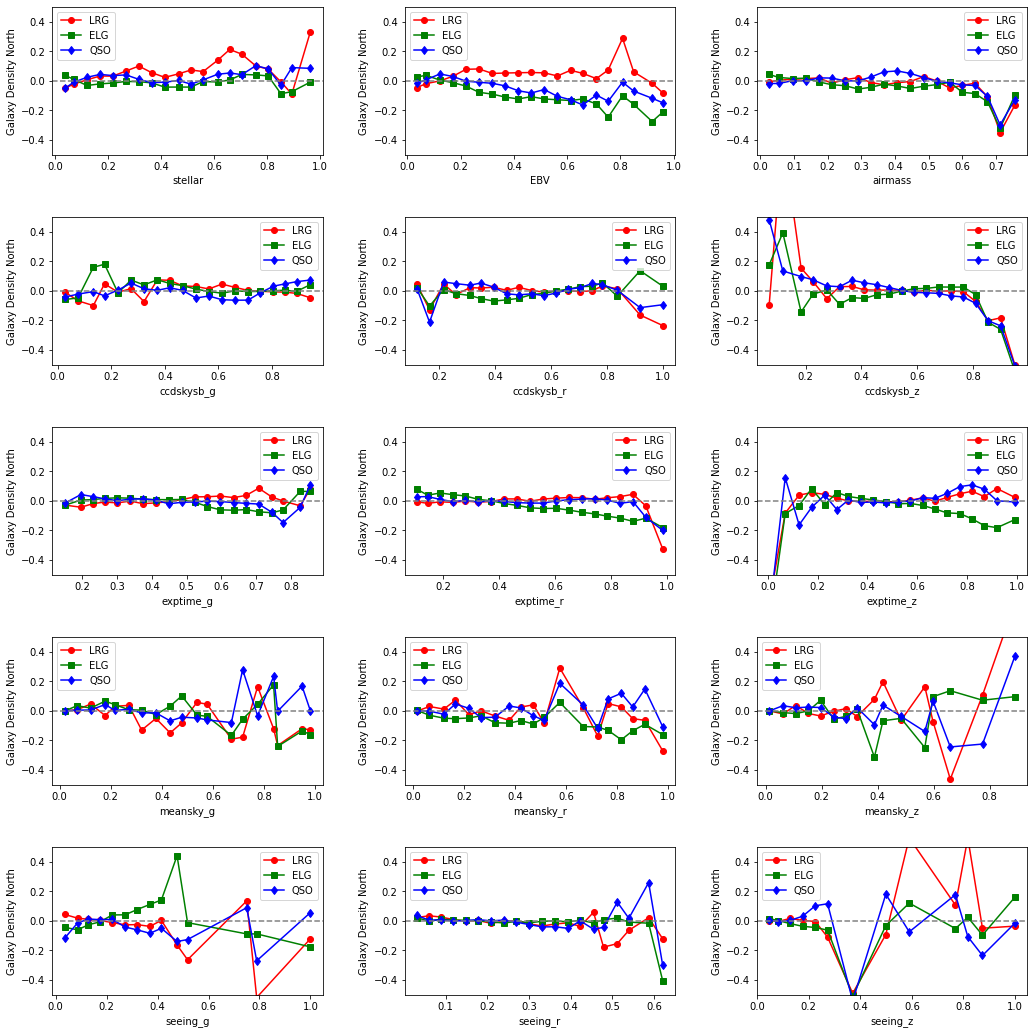

In [167]:
print(len(col))
nrows = 5
ncols = 3
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,15))

#fig = plt.figure()
i = 0
for ax in ax.flatten():
    x_label = col[i]
    df_test_north['bin'] = pd.cut(df_test_north[x_label], bins=20, labels=False, duplicates='drop', include_lowest=True)
    grouped = df_test_north.groupby('bin')
    x = grouped[x_label].mean()
    lrg = grouped['lrg_density'].mean()
    elg = grouped['elg_density'].mean()
    qso = grouped['qso_density'].mean()
    plt.axes(ax)
    plt.plot(x,lrg, c='red', marker='o', label="LRG")
    plt.plot(x, elg, c='green', marker='s', label="ELG")
    plt.plot(x, qso, c='blue', marker='d', label="QSO")
    plt.axhline(y=0, color='gray', linestyle='--')
    plt.ylim([-0.5, 0.5])
    plt.xlabel(x_label)
    plt.ylabel("Galaxy Density North")
    plt.legend()
    i += 1


fig.tight_layout(pad=3.0)
plt.show()

15


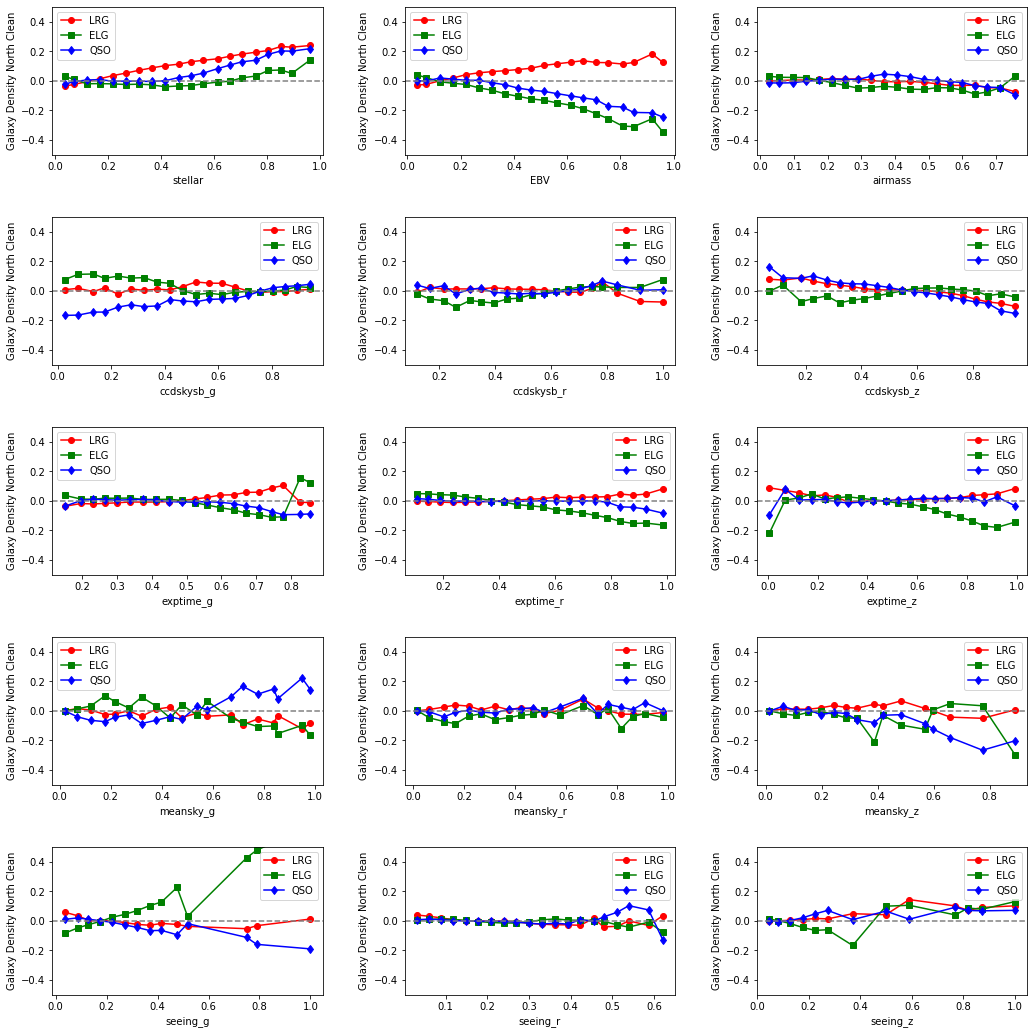

In [168]:
print(len(col))
nrows = 5
ncols = 3
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,15))

#fig = plt.figure()
i = 0
for ax in ax.flatten():
    x_label = col[i]
    df_test_north['bin'] = pd.cut(df_test_north[x_label], bins=20, labels=False, duplicates='drop', include_lowest=True)
    grouped = df_test_north.groupby('bin')
    x = grouped[x_label].mean()
    lrg = grouped['lrg_lin_density'].mean()
    elg = grouped['elg_lin_density'].mean()
    qso = grouped['qso_lin_density'].mean()
    plt.axes(ax)
    plt.plot(x,lrg, c='red', marker='o', label="LRG")
    plt.plot(x, elg, c='green', marker='s', label="ELG")
    plt.plot(x, qso, c='blue', marker='d', label="QSO")
    plt.axhline(y=0, color='gray', linestyle='--')
    plt.ylim([-0.5, 0.5])
    plt.xlabel(x_label)
    plt.ylabel("Galaxy Density North Clean")
    plt.legend()
    i += 1


fig.tight_layout(pad=3.0)
plt.show()

In [ ]:

plt.plot(x,lrg, c='red', marker='o', label="LRG")
plt.plot(x,elg, c='green', marker='s', label="ELG")
plt.plot(x,qso, c='blue', marker='d', label="QSO")
plt.axhline(y=0, color='gray', linestyle='--')
plt.ylim([-0.4,0.4])
plt.xlabel(x_label)
plt.ylabel("Galaxy Density North")
plt.legend()
plt.show()


In [156]:
lrg = grouped['lrg_lin_density'].mean()
elg = grouped['elg_lin_density'].mean()
qso = grouped['qso_lin_density'].mean()

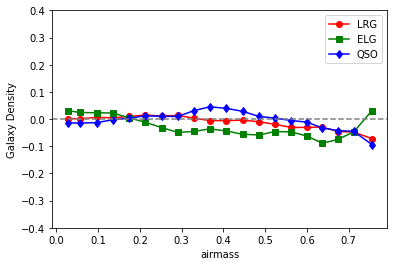

In [157]:

plt.plot(x,lrg, c='red', marker='o', label="LRG")
plt.plot(x,elg, c='green', marker='s', label="ELG")
plt.plot(x,qso, c='blue', marker='d', label="QSO")
plt.axhline(y=0, color='gray', linestyle='--')
plt.ylim([-0.4,0.4])
plt.xlabel(x_label)
plt.ylabel("Galaxy Density North")
plt.legend()
plt.show()




In [59]:
"""df_train = df_train.drop(columns=['pixel_id', 'exposures'], axis=1, inplace=False)
df_val = df_val.drop(columns=['pixel_id', 'exposures'], axis=1, inplace=False)
df_test = df_test.drop(columns=['pixel_id', 'exposures'], axis=1, inplace=False)

df_train.head()"""

,lrg,elg,qso,stellar,EBV,airmass,ccdskysb_g,ccdskysb_r,ccdskysb_z,exptime_g,exptime_r,exptime_z,meansky_g,meansky_r,meansky_z,seeing_g,seeing_r,seeing_z
18672,-0.080577,0.255223,-0.132988,0.186047,0.422986,0.533872,0.633251,0.667807,0.468989,0.49574,0.49819,0.49953,1.303977e-09,1.935919e-09,3.466607e-11,0.320309,0.317041,0.477861
41573,-0.325757,-0.267787,-0.295553,0.232558,0.166904,0.528785,0.655700,0.785395,0.564151,0.49574,0.49819,0.49953,4.900065e-11,1.833622e-11,1.997833e-11,0.312848,0.258569,0.359843
22857,0.409781,0.062112,-0.072779,0.155039,0.220927,0.546604,0.641149,0.738988,0.481012,0.49574,0.49819,0.49953,1.300409e-09,2.188329e-10,3.274156e-11,0.359590,0.373541,0.433810
43951,-0.172520,-0.074675,0.035598,0.054264,0.119716,0.304057,0.702741,0.712409,0.410202,0.49574,0.49819,0.49953,1.605942e-01,1.271689e-01,3.706812e-11,0.325845,0.396537,0.211284
78423,-0.233815,-0.179277,-0.102884,0.217054,0.071129,0.459201,0.706938,0.716490,0.378699,0.49574,0.49819,0.49953,4.125571e-01,2.076416e-11,1.263105e-01,0.376258,0.245389,0.384479


# Regression

In [51]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
galaxy_types = ['lrg','elg','qso']


In [44]:
X_train = df_train.drop(columns=['lrg','elg','qso'])
X_train.columns

Index(['stellar', 'EBV', 'airmass', 'ccdskysb_g', 'ccdskysb_r', 'ccdskysb_z',
       'exptime_g', 'exptime_r', 'exptime_z', 'meansky_g', 'meansky_r',
       'meansky_z', 'seeing_g', 'seeing_r', 'seeing_z'],
      dtype='object')

In [45]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(1)


X_train = df_train.drop(columns=['lrg','elg','qso'])#.to_numpy(copy=True)
X_train = poly.fit_transform(X_train)

X_train.shape

(130002, 16)

### Geometrics

### Geometric - Linear Regression

In [46]:
for gal in galaxy_types:
    y_train = df_train[gal]#.to_numpy(copy=True)
    X_train = df_train.drop(columns=['lrg','elg','qso'])#.to_numpy(copy=True)
    #X_train = poly.fit_transform(X_train)
    y_gold = df_val[gal]
    X_test = df_val.drop(columns=['lrg','elg','qso'])
    #X_test = poly.fit_transform(X_test)
    reg = LinearRegression()
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)

    print(f"Linear Regression R^2 for {gal}, Geometric :  {metrics.r2_score(y_gold, y_pred)}.")
    print(f"Linear Regression MSE for {gal}, Geometric :  {metrics.mean_squared_error(y_gold, y_pred)}.")
    print()

Linear Regression R^2 for lrg, Geometric :  0.018980937942204568.
Linear Regression MSE for lrg, Geometric :  0.12089498715391635.

Linear Regression R^2 for elg, Geometric :  0.07516276265128541.
Linear Regression MSE for elg, Geometric :  0.029528829094955834.

Linear Regression R^2 for qso, Geometric :  0.04619522895097805.
Linear Regression MSE for qso, Geometric :  0.029619841797991615.



### Geometric - Ridge Regression

In [47]:
for gal in galaxy_types:
    y_train = df_train[gal]#.to_numpy(copy=True)
    X_train = df_train.drop(columns=['lrg','elg','qso'])#.to_numpy(copy=True)
    X_train = poly.fit_transform(X_train)
    y_gold = df_val[gal]
    X_test = df_val.drop(columns=['lrg','elg','qso'])
    X_test = poly.fit_transform(X_test)
    reg = Ridge()
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)

    print(f"Ridge Regression R^2 for {gal}, Geometric :  {metrics.r2_score(y_gold, y_pred)}.")
    print(f"Ridge Regression MSE for {gal}, Geometric :  {metrics.mean_squared_error(y_gold, y_pred)}.")
    print()

Ridge Regression R^2 for lrg, Geometric :  0.018988631375289278.
Ridge Regression MSE for lrg, Geometric :  0.12089403906072436.

Ridge Regression R^2 for elg, Geometric :  0.07516839202665182.
Ridge Regression MSE for elg, Geometric :  0.029528649356450082.

Ridge Regression R^2 for qso, Geometric :  0.046201993111527506.
Ridge Regression MSE for qso, Geometric :  0.0296196317409952.



### Geometric - Lasso Regression

In [10]:
for gal in galaxy_types:
    y_train = df_train[gal]#.to_numpy(copy=True)
    X_train = df_train.drop(columns=['lrg','elg','qso'])#.to_numpy(copy=True)
    X_train = poly.fit_transform(X_train)
    y_gold = df_val[gal]
    X_test = df_val.drop(columns=['lrg','elg','qso'])
    X_test = poly.fit_transform(X_test)
    reg = Lasso()
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)

    print(f"Lasso Regression R^2 for {gal}, Geometric :  {metrics.r2_score(y_gold, y_pred)}.")
    print(f"Lasso Regression MSE for {gal}, Geometric :  {metrics.mean_squared_error(y_gold, y_pred)}.")
    print()


Lasso Regression R^2 for lrg, Geometric :  -2.418299939410673e-06.
Lasso Regression MSE for lrg, Geometric :  0.0054751607500748145.

Lasso Regression R^2 for elg, Geometric :  -3.152215577451045e-08.
Lasso Regression MSE for elg, Geometric :  0.0037760458659981213.

Lasso Regression R^2 for qso, Geometric :  -1.135833249299445e-05.
Lasso Regression MSE for qso, Geometric :  0.00437451324008519.



In [11]:
# Using the Best classifier to test on the testset

In [60]:
poly = PolynomialFeatures(1)

# Stacking Train and Val Set
print("Results for full dataset on unseen test-set")
for gal in galaxy_types:
    y_train = df_train[gal]#.to_numpy(copy=True)
    X_train = df_train.drop(columns=['lrg','elg','qso'])#.to_numpy(copy=True)
    #X_train = poly.fit_transform(X_train)
    y_gold = df_test[gal]
    X_test = df_test.drop(columns=['lrg','elg','qso'])
    #X_test = poly.fit_transform(X_test)
    reg = LinearRegression()
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)

    print(f"Linear Regression R^2 for {gal}, Geometric :  {metrics.r2_score(y_gold, y_pred)}.")
    print(f"Linear Regression MSE for {gal}, Geometric :  {metrics.mean_squared_error(y_gold, y_pred)}.")
    print()

Results for full dataset on unseen test-set
Linear Regression R^2 for lrg, Geometric :  0.013128428697120276.
Linear Regression MSE for lrg, Geometric :  0.09540153389842199.

Linear Regression R^2 for elg, Geometric :  0.05983083094766639.
Linear Regression MSE for elg, Geometric :  0.020893342318513523.

Linear Regression R^2 for qso, Geometric :  0.048467717066127736.
Linear Regression MSE for qso, Geometric :  0.020696656891841053.



In [25]:
poly = PolynomialFeatures(3)

# Stacking Train and Val Set
print("Results for full dataset on unseen test-set")
for gal in galaxy_types:
    y_train = df_train[gal]#.to_numpy(copy=True)
    X_train = df_train.drop(columns=['lrg','elg','qso'])#.to_numpy(copy=True)
    X_train = poly.fit_transform(X_train)
    y_gold = df_test[gal]
    X_test = df_test.drop(columns=['lrg','elg','qso'])
    X_test = poly.fit_transform(X_test)
    reg = Ridge()
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)

    print(f"Linear Regression R^2 for {gal}, Geometric :  {metrics.r2_score(y_gold, y_pred)}.")
    print(f"Linear Regression MSE for {gal}, Geometric :  {metrics.mean_squared_error(y_gold, y_pred)}.")
    print()

Results for full dataset on unseen test-set
Linear Regression R^2 for lrg, Geometric :  0.0216397547590933.
Linear Regression MSE for lrg, Geometric :  0.0945787383235633.

Linear Regression R^2 for elg, Geometric :  0.08222583506575165.
Linear Regression MSE for elg, Geometric :  0.020395659026329723.

Linear Regression R^2 for qso, Geometric :  0.07628248357228729.
Linear Regression MSE for qso, Geometric :  0.020091661465800777.



### Running Regression on the TrainSet to compare to previous results

In [13]:
df_geometric = pd.read_csv('../../bricks_data/train.csv')

df_geometric_reg = df_geometric.drop(columns=['pixel_id', 'exposures','Z'])
df_geometric_reg.head()

,lrg,elg,qso,stellar,EBV,airmass,ccdskysb_g,ccdskysb_r,ccdskysb_z,exptime_g,...,meansky_z,galdepth_g,galdepth_r,galdepth_z,seeing_g,seeing_r,seeing_z,mjd_obs_g,mjd_obs_r,mjd_obs_z
0,0.255556,0.402256,0.409396,0.205357,0.171079,0.140918,0.578889,0.518889,0.592086,0.175793,...,5.513443e-01,0.480686,0.674590,0.283245,0.301927,0.311998,0.129479,0.388261,0.465611,0.436698
1,0.288889,0.421053,0.406040,0.049107,0.016430,0.013747,0.630872,0.672316,0.438492,0.168644,...,2.840472e-11,0.511487,0.582933,0.750504,0.211973,0.091550,0.120701,0.518587,0.498003,0.443110
2,0.688889,0.503759,0.704698,0.058036,0.062640,0.152529,0.626110,0.577056,0.605068,0.175793,...,3.579294e-01,0.596021,0.695755,0.299528,0.269886,0.283358,0.172838,0.510175,0.522231,0.454674
3,0.255556,0.255639,0.228188,0.062500,0.618593,0.411554,0.617269,0.568405,0.628472,0.548694,...,5.566131e-11,0.832612,0.766486,0.719828,0.299032,0.254469,0.209068,0.861329,0.798231,0.806972
4,0.411111,0.488722,0.503356,0.120536,0.200576,0.304894,0.651783,0.620234,0.540708,0.405109,...,8.777782e-11,0.748213,0.680751,0.705337,0.411908,0.393542,0.130524,0.764569,0.798398,0.271826


In [14]:
y_lrg = df_geometric_reg['lrg']#.to_numpy(copy=True)
y_elg = df_geometric_reg['elg']#.to_numpy(copy=True)
y_qso = df_geometric_reg['qso']#.to_numpy(copy=True)

df_geometric_reg.columns

Index(['lrg', 'elg', 'qso', 'stellar', 'EBV', 'airmass', 'ccdskysb_g',
       'ccdskysb_r', 'ccdskysb_z', 'exptime_g', 'exptime_r', 'exptime_z',
       'meansky_g', 'meansky_r', 'meansky_z', 'galdepth_g', 'galdepth_r',
       'galdepth_z', 'seeing_g', 'seeing_r', 'seeing_z', 'mjd_obs_g',
       'mjd_obs_r', 'mjd_obs_z'],
      dtype='object')

In [20]:
X = df_geometric_reg.drop(columns=['lrg','elg','qso'])#.to_numpy(copy=True)
print(X.head())

    stellar       EBV   airmass  ccdskysb_g  ccdskysb_r  ccdskysb_z  \
0  0.205357  0.171079  0.140918    0.578889    0.518889    0.592086   
1  0.049107  0.016430  0.013747    0.630872    0.672316    0.438492   
2  0.058036  0.062640  0.152529    0.626110    0.577056    0.605068   
3  0.062500  0.618593  0.411554    0.617269    0.568405    0.628472   
4  0.120536  0.200576  0.304894    0.651783    0.620234    0.540708   

   exptime_g  exptime_r  exptime_z     meansky_g  ...     meansky_z  \
0   0.175793   0.214407   0.277244  4.425635e-01  ...  5.513443e-01   
1   0.168644   0.112169   0.236833  2.562594e-10  ...  2.840472e-11   
2   0.175793   0.214407   0.277244  2.103379e-01  ...  3.579294e-01   
3   0.548694   0.164378   0.473245  7.195705e-11  ...  5.566131e-11   
4   0.405109   0.131026   0.439217  6.489902e-11  ...  8.777782e-11   

   galdepth_g  galdepth_r  galdepth_z  seeing_g  seeing_r  seeing_z  \
0    0.480686    0.674590    0.283245  0.301927  0.311998  0.129479   
1   

In [21]:
print(len(y_lrg))
print(len(X))

217027
217027


In [25]:
gal = 'lrg'
ols_lrg_geometric = sm.OLS(y_lrg,X).fit()
y_pred= ols_lrg_geometric.predict(df_test.drop(columns=['lrg','elg','qso']))
y_gold = df_test[gal]
print(ols_lrg_geometric.summary())
print()
print(f"Regression R^2 for {gal}, Geometric :  {metrics.r2_score(y_gold, y_pred)}.")
print()
gal = 'elg'
ols_elg_geometric = sm.OLS(y_elg,X).fit()
y_pred= ols_elg_geometric.predict(df_test.drop(columns=['lrg','elg','qso']))
y_gold = df_test[gal]
print(ols_elg_geometric.summary())
print()
print(f"Regression R^2 for {gal}, Geometric :  {metrics.r2_score(y_gold, y_pred)}.")
print()
gal = 'qso'
ols_qso_geometric = sm.OLS(y_qso,X).fit()
y_pred= ols_qso_geometric.predict(df_test.drop(columns=['lrg','elg','qso']))
y_gold = df_test[gal]
print(ols_qso_geometric.summary())
print()
print(f"Regression R^2 for {gal}, Geometric :  {metrics.r2_score(y_gold, y_pred)}.")
print()


                                 OLS Regression Results                                
Dep. Variable:                    lrg   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.884
Method:                 Least Squares   F-statistic:                          7.840e+04
Date:                Thu, 05 Aug 2021   Prob (F-statistic):                        0.00
Time:                        19:21:44   Log-Likelihood:                      1.3521e+05
No. Observations:              217027   AIC:                                 -2.704e+05
Df Residuals:                  217006   BIC:                                 -2.702e+05
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
y_train = df_train['lrg']#.to_numpy(copy=True)
X_train = df_train.drop(columns=['lrg','elg','qso'])#.to_numpy(copy=True)
y_gold = df_val[gal]
X_test = df_val.drop(columns=['lrg','elg','qso'])
    reg = Lasso()
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)

    print(f"Lasso Regression R^2 for {gal}, Geometric :  {metrics.r2_score(y_gold, y_pred)}.")
    print(f"Lasso Regression MSE for {gal}, Geometric :